In [4]:
# Core #
import json
import os
import re

from os import chdir
chdir('/Users/chstansbury/PyCharmProjects/python-arpes/')

# IO
import h5py

# Science And Plotting #
import matplotlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import holoviews as hv
import holoviews.util
hv.extension('matplotlib')

sns.set()

from scipy import optimize


# Analysis #
import arpes
import arpes.config
from arpes.models.spectrum import DLD_Spectrum_factory, load_SES
from arpes.utilities.dataset import hv_scans, map_scans

# Jupyter #
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Configure Jupyter #
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy
from arpes.utilities.conversion import convert_coordinates

import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
full_metadata = None
with open(os.path.join(arpes.config.SOURCE_PATH, 'datasets/RhSn2/RhSn_June.json')) as metadata_file:
    full_metadata = json.load(metadata_file)

In [9]:
from arpes.utilities.dataset import hv_scans
hv = load_SES(hv_scans(full_metadata)[0])

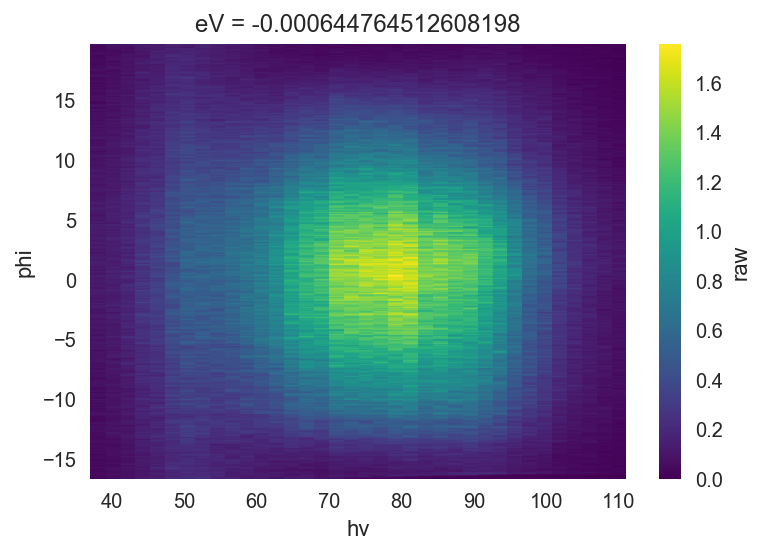

In [10]:
hv.raw.sel(eV=0, method='nearest').plot()

In [11]:
from arpes.corrections import build_photon_energy_fermi_edge_correction

edge_fit = build_photon_energy_fermi_edge_correction(hv.raw)

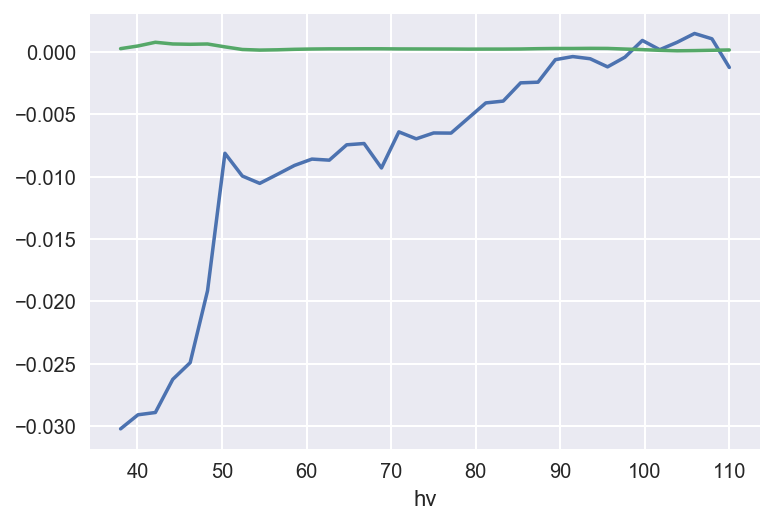

In [19]:
from arpes.utilities import apply_dataarray
apply_dataarray(edge_fit, np.vectorize(lambda x: x.params['center'].value)).plot()
apply_dataarray(edge_fit, np.vectorize(lambda x: x.params['center'].stderr)).plot()

In [25]:
from arpes.corrections import apply_photon_energy_fermi_edge_correction

In [26]:
corrected = apply_photon_energy_fermi_edge_correction(hv.raw)

0 2


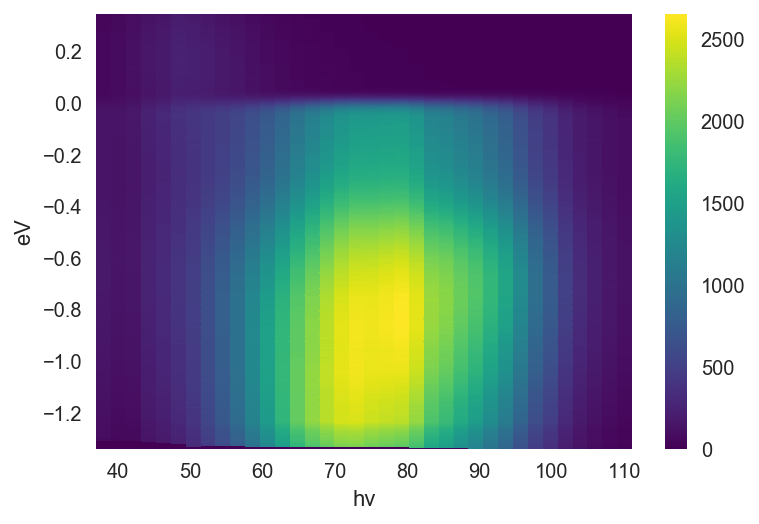

In [28]:
corrected.sum('phi').plot()